In [ ]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import sys
from tqdm import tqdm
from Reservoir import CustomReservoir
from utils import stability_test

%load_ext autoreload
%autoreload 2

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:3" if use_cuda else "cpu")  # TOCHANGE 1/3

filename = '241201usual_input_input_len10000'  # TOCHANGE 2/3

In [2]:
seed = 0
res_size = 101
input_size = 102
input_len = 10000
resolution = 1000
res_scale_bounds = [1.62, 1.92]
input_scale_bounds = [1, 1.3]
metric_erf = stability_test(res_size=res_size, input_size=input_size, input_len=input_len, resolution=resolution, constant_input=False,
                            res_scale_bounds=res_scale_bounds, input_scale_bounds=input_scale_bounds, device=device, seed=seed)

3it [00:23,  7.69s/it]


KeyboardInterrupt: 

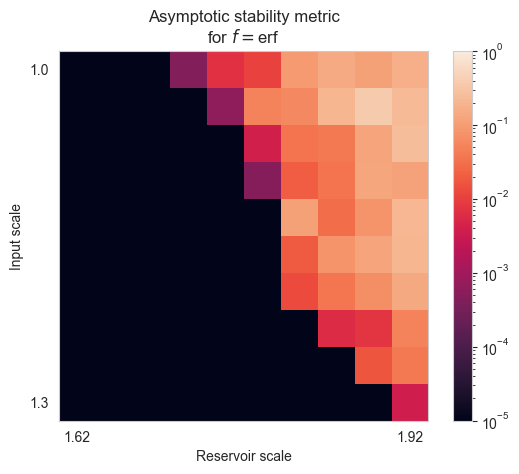

In [9]:
plt.figure()
seaborn.set_style("whitegrid")
img = metric_erf.T
threshold = 1e-5
img[img<threshold]= threshold
input_min = 0
input_max = 1
res_min = 0
res_max = 1
plt.imshow(img[int(input_min*resolution):int(input_max*resolution), int(res_min*resolution):int(res_max*resolution)], norm=matplotlib.colors.LogNorm(vmin= 1e-10, vmax = 1))#

ax = plt.gca()
plt.grid(False)
plt.clim(threshold, 1)
plt.colorbar()

input_scale_min = input_scale_bounds[0] + input_min * (input_scale_bounds[1] - input_scale_bounds[0])
input_scale_max = input_scale_bounds[0] + input_max * (input_scale_bounds[1] - input_scale_bounds[0])
res_scale_min = res_scale_bounds[0] + res_min * (res_scale_bounds[1] - res_scale_bounds[0])
res_scale_max = res_scale_bounds[0] + res_max * (res_scale_bounds[1] - res_scale_bounds[0])
ylab = np.linspace(input_scale_min, input_scale_max, num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_min, res_scale_max, num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, resolution-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, resolution-1, num=ylab.shape[0]).astype(int)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale')
ax.set_ylabel('Input scale')
ax.set_title('Asymptotic stability metric\nfor $f=$erf')

plt.show()


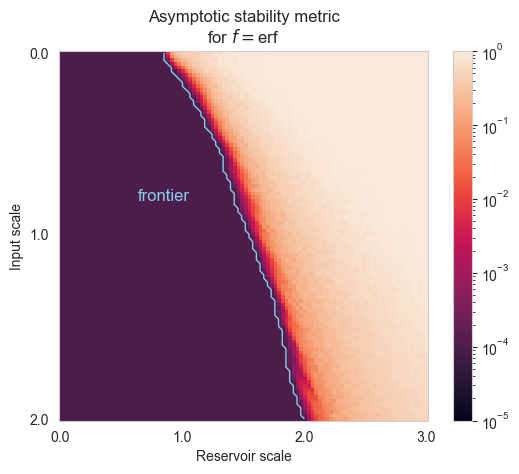

In [ ]:
plt.figure()
seaborn.set_style("whitegrid")
img = metric_erf.T
threshold = 1e-5
img[img<threshold]= threshold
plt.imshow(img, norm=matplotlib.colors.LogNorm(vmin= 1e-10, vmax = 1))#

ax = plt.gca()
plt.grid(False)
plt.clim(threshold, 1)
plt.colorbar()

ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, resolution-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, resolution-1, num=ylab.shape[0]).astype(int)

color = "skyblue"
plt.contour(metric_erf.T, levels=[threshold*10], colors=color, linewidths=[1])
# plt.annotate('frontier', xy=(70, 80), color=color)
plt.annotate('frontier', xy=(21, 40), color=color, fontsize=12)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale')
ax.set_ylabel('Input scale')
ax.set_title('Asymptotic stability metric\nfor $f=$erf')

# plt.savefig("220125relu.svg")
plt.show()


In [97]:
metric_erf.T

tensor([[2.0000e-06, 2.0000e-06, 2.0000e-06,  ..., 1.5670e+00, 1.6501e+00,
         1.4939e+00],
        [2.0000e-06, 2.0000e-06, 2.0000e-06,  ..., 1.6380e+00, 1.4895e+00,
         1.4998e+00],
        [2.0000e-06, 2.0000e-06, 2.0000e-06,  ..., 1.7332e+00, 1.5904e+00,
         1.3240e+00],
        ...,
        [2.0000e-06, 2.0000e-06, 2.0000e-06,  ..., 5.1511e-01, 4.6368e-01,
         6.8043e-01],
        [2.0000e-06, 2.0000e-06, 2.0000e-06,  ..., 3.7054e-01, 3.5951e-01,
         5.0349e-01],
        [2.0000e-06, 2.0000e-06, 2.0000e-06,  ..., 5.5243e-01, 2.6482e-01,
         3.0739e-01]])